# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load the data

In [2]:
data = pd.read_csv(r"C:\Users\athir\data_sets\ML\Assg\train_set.csv")
data.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [3]:
data.shape

(287836, 15)

# step 3: data cleaning, data wrangling, data preprocessing

In [4]:
data.isnull().sum()

Year                   0
OGC                    0
OG                     0
DC                     0
Dept                   0
UC                     0
Union                 36
JF                    38
Job                    0
EI                     0
Salaries               0
Overtime               0
H/D                    0
YT                     0
Total_Compensation     0
dtype: int64

In [5]:
data.isnull().sum()/len(data)*100

Year                  0.000000
OGC                   0.000000
OG                    0.000000
DC                    0.000000
Dept                  0.000000
UC                    0.000000
Union                 0.012507
JF                    0.013202
Job                   0.000000
EI                    0.000000
Salaries              0.000000
Overtime              0.000000
H/D                   0.000000
YT                    0.000000
Total_Compensation    0.000000
dtype: float64

In [6]:
data['Union'] = data['Union'].fillna(data['Union'].mode()[0])
data['JF'] = data['JF'].fillna(data['JF'].mode()[0])
data.isnull().sum()

Year                  0
OGC                   0
OG                    0
DC                    0
Dept                  0
UC                    0
Union                 0
JF                    0
Job                   0
EI                    0
Salaries              0
Overtime              0
H/D                   0
YT                    0
Total_Compensation    0
dtype: int64

In [7]:
data.columns

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT', 'Total_Compensation'],
      dtype='object')

In [8]:
# drop unwanted columns
data = data.drop(['Year', 'OGC', 'OG', 'DC','UC', 'Union', 'JF', 'Job', 'EI','Dept'], axis = 1)
data.head()

,Salaries,Overtime,H/D,YT,Total_Compensation
0,12196,0,0.00,Calendar,16158
1,74639,2820,12703.31,Fiscal,115784
2,100554,0,12424.50,Calendar,144708
3,140164,52754,13043.87,Fiscal,242323
4,58813,0,7655.28,Calendar,82106


## Feature scaling 

In [9]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms

MinMaxScaler()

In [10]:
data[['Salaries','Overtime','H/D','Total_Compensation']] = mms.fit_transform(data[['Salaries','Overtime','H/D','Total_Compensation']])
data.head()

,Salaries,Overtime,H/D,YT,Total_Compensation
0,0.138673,0.051364,0.118504,Calendar,0.124028
1,0.245619,0.063133,0.630460,Fiscal,0.260955
2,0.290004,0.051364,0.619224,Calendar,0.300709
3,0.357844,0.271520,0.644185,Fiscal,0.434873
4,0.218514,0.051364,0.427019,Calendar,0.214668


<Axes: >

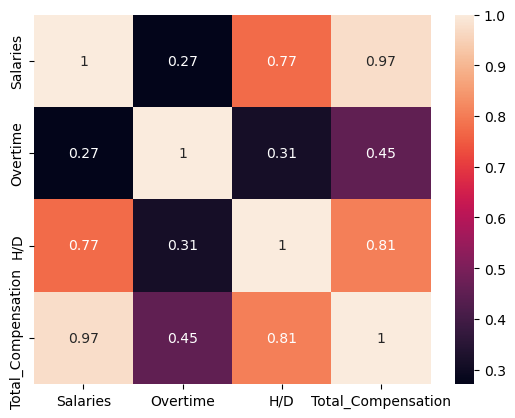

In [11]:
sns.heatmap(data.corr(),annot = True)

## Observations:
- salaries(indep) and total compensation(dep) : 0.97
- overtime (indep) and total_compensation(dep) : 0.45
- H/D(indep) and total_compensation(dep) : 0.81
- salaries(indep) and H/D(indep) : 0.77 : problem of multicolinearity: Hence we have to delete the independent variable which is having less realtin with the target variable.

In [12]:
data= data.drop('H/D',axis =1)
data.head()

,Salaries,Overtime,YT,Total_Compensation
0,0.138673,0.051364,Calendar,0.124028
1,0.245619,0.063133,Fiscal,0.260955
2,0.290004,0.051364,Calendar,0.300709
3,0.357844,0.271520,Fiscal,0.434873
4,0.218514,0.051364,Calendar,0.214668


## Feature Encoding

In [13]:
data_ohe = pd.get_dummies(data['YT'])
data_ohe.head()

,Calendar,Fiscal
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [14]:
data = pd.concat([data,data_ohe],axis=1)
data.head()

,Salaries,Overtime,YT,Total_Compensation,Calendar,Fiscal
0,0.138673,0.051364,Calendar,0.124028,1,0
1,0.245619,0.063133,Fiscal,0.260955,0,1
2,0.290004,0.051364,Calendar,0.300709,1,0
3,0.357844,0.271520,Fiscal,0.434873,0,1
4,0.218514,0.051364,Calendar,0.214668,1,0


In [15]:
data = data.drop('YT',axis = 1)

In [16]:
data.head()

,Salaries,Overtime,Total_Compensation,Calendar,Fiscal
0,0.138673,0.051364,0.124028,1,0
1,0.245619,0.063133,0.260955,0,1
2,0.290004,0.051364,0.300709,1,0
3,0.357844,0.271520,0.434873,0,1
4,0.218514,0.051364,0.214668,1,0


In [17]:
data = data[['Salaries','Overtime','Calendar','Fiscal','Total_Compensation']]
data.head()

,Salaries,Overtime,Calendar,Fiscal,Total_Compensation
0,0.138673,0.051364,1,0,0.124028
1,0.245619,0.063133,0,1,0.260955
2,0.290004,0.051364,1,0,0.300709
3,0.357844,0.271520,0,1,0.434873
4,0.218514,0.051364,1,0,0.214668


# step 4: separate x and y

In [18]:
x = data.drop('Total_Compensation', axis=1)
y = data['Total_Compensation']

# step 5: split the data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

# step 6: Apply linear regression on train set

In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [23]:
lr.fit(x_train,y_train)

LinearRegression()

# step 7: Perform predictions on test set

In [25]:
y_pred = lr.predict(x_test)
y_pred

array([0.2384347 , 0.10977654, 0.39271439, ..., 0.12793792, 0.19050669,
       0.22740299])

In [26]:
x_test.head()

,Salaries,Overtime,Calendar,Fiscal
103391,0.217049,0.099783,0,1
133289,0.119701,0.051364,0,1
279190,0.372498,0.051364,1,0
123564,0.171760,0.051364,0,1
271922,0.309534,0.082585,0,1


# step 8: Evaluation

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9849380016626351

In [29]:
lr.coef_

array([ 1.11697965e+00,  4.11457238e-01,  2.84461169e-04, -2.84461169e-04])

In [30]:
lr.intercept_

-0.04477673586895037

# from the values we can calculate the corresponding compensation for each employees.
The equation is, 
- y = m1x1+ m2x2+ m3x3+ m4x4+ c
- y = total_compensation
- m1 = slope corr.to salaries
- x1 = salaries
- m2 = slope corr.to overtime
- x2 = overtime
- m3 = slope corr.to calendar
- x3 = calendar
- m4 = slope corr.to fiscal
- x4 = fiscal
- c = intercept